# Introduction

## About this notebook

This sample code provides some hints for performing text analysis using a TEI file.
First, press the run button (▶) on each code cell to check how the code works.

## About this project

Osaka University Global Japanese Studies Education and Research Center

FY2023 Educational Program Development Model


[拠点形成プロジェクト「人文科学分野向け研究データ管理を促進するデジタル・ヒューマニティーズ学習教材開発」](https://www.gjs.osaka-u.ac.jp/project/2023a/)



## Licensing
The license is the Creative Commons Attribution 4.0 International [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/deed.ja). Please feel free to adapt the content to suit your own purposes.


# Setting up the environment and loading the data

First, let’s install the programs needed to run everything.
Then, click the run button (▶) on the left side of each code cell.


BeautifulSoup is a library (a bundled set of programs) that allows Python to easily parse HTML and XML files. It is useful for web scraping, extracting data, and analyzing document structure.

In [1]:
!pip install beautifulsoup4

Next, let’s load the TEI data.
The TEI format is also an XML format, so the file extension is .xml.
In this sample code, we will use the TEI data of [Dazai Osamu’s Run, Melos! (Hashire Melos)](https://www.aozora.gr.jp/cards/000035/files/1567_14913.html) stored in Aozora Bunko.

In [2]:
!curl -O 'https://raw.githubusercontent.com/nikolito/TEI-tools/main/meros.xml'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 87871  100 87871    0     0   205k      0 --:--:-- --:--:-- --:--:--  206k


The downloaded data is located inside the folder-shaped icon on the left side of this screen.

# Let’s take a look at the contents of the TEI/XML file.

To extract the information we need from the file, we first need to examine the structure of the TEI/XML file we want to analyze.

Let’s go ahead and load the TEI/XML file you just downloaded.

In [3]:
with open("meros.xml", encoding='utf8') as f:
    print(f.read())

<?xml version="1.0" encoding="UTF-8"?>
<TEI xmlns="http://www.tei-c.org/ns/1.0">
      <teiHeader>
            <fileDesc>
                  <titleStmt>
                        <title>走れメロス</title>
                        <author>太宰治</author>
                        <respStmt>
                              <resp>Transcription</resp>
                              <name>金川一之</name>
                        </respStmt>
                        <respStmt>
                              <resp>Proofreading</resp>
                              <name>高橋美奈子</name>
                        </respStmt>
                        <respStmt>
                              <resp>TEI encoding</resp>
                              <name>永崎研宣</name>
                        </respStmt>
                  </titleStmt>
                  <publicationStmt>
                        <distributor>青空文庫</distributor>
                        <authority>金川一之</authority>
                        <authority>高橋美奈子</authority>
   

# Let’s display the text with all TEI tags removed from the TEI file



In [4]:
# module installation
from bs4 import BeautifulSoup

# Load the TEI file and have BeautifulSoup extract the XML elements.
file_path = "meros.xml"

with open(file_path, "r", encoding="utf-8") as file:
    soup = BeautifulSoup(file, "xml")

# Remove the <rt> tags.
for ruby in soup.find_all("rt"):
    ruby.decompose()

# Extract the <text> element and remove all tags inside it to obtain plain text.
text_content = soup.find("text").get_text(strip=True)

# Display the first 1,000 characters of the text without tags.
print(text_content[:1000] + "...")

メロスは激怒した。必ず、かの邪智暴虐の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。
                        笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。 十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。 先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。
                        その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、 訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。 ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、 なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、 だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、
                        二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈だが、と質問した。若い衆は、首を振って答えなかった。
                        しばらく歩いて老爺に逢い、
                        こんどはもっと、語勢を強くして質問した。老爺は答えなかった。メロスは両手で老爺のからだをゆすぶって質問を重ねた。老爺は、 あたりをはばかる低声で、わずか答えた。「王様は、人を殺します。」「なぜ殺すのだ。」「悪心を抱いている、というのですが、誰もそんな、悪心を持っては居りませぬ。」「たくさんの人を殺したのか。」「はい、はじめは王様の妹婿さまを。それから、御自身のお世嗣を。
                        それから、妹さまを。それから、妹さまの御子さまを。それから、皇后さまを。 それから、賢臣のア

Because there are no line breaks, the layout is a bit messy.

Let’s use the textwrap library to tidy it up and make it more readable.

In [5]:
# Wrap the text every 20 characters and display up to 300 characters
import textwrap

wrapped_text = textwrap.fill(text_content, width=20)
print(wrapped_text[:300] + "...")

メロスは激怒した。必ず、かの邪智暴虐の王
を除かなければならぬと決意した。メロスに
は政治がわからぬ。メロスは、村の牧人であ
る。
笛を吹き、羊と遊んで暮して来た。けれども
邪悪に対しては、人一倍に敏感であった。き
ょう未明メロスは村を出発し、野を越え山越
え、十里はなれた此のシラクスの市にやって
来た。メロスには父も、母も無い。女房も無
い。 十六の、内気な妹と二人暮しだ。この
妹は、村の或る律気な一牧人を、近々、花婿
として迎える事になっていた。結婚式も間近
かなのである。メロスは、それゆえ、花嫁の
衣裳やら祝宴の御馳走やらを買いに、はるば
る市にやって来たのだ。 先ず、その品々を
買い集...


From here on, we will look at how to extract only the information you need from within the XML file.
To do this, checking the markup rules becomes a critically important step.

# To check the markup rules of this file,

## Let’s first examine the hierarchical structure.

When you want to extract the information you need from a TEI file, you first have to check which tags are used and how they are arranged in the hierarchy.


To start, here is a handy little program that lets you quickly grasp the hierarchical structure of the tags.

In [6]:
from bs4 import BeautifulSoup
from IPython.display import display, HTML

def generate_collapsible_html(tag, indent=0):
    # Recursively display the XML tags in a hierarchical structure
    children = tag.find_all(recursive=False)
    if not children:
        return f'<div style="margin-left: {indent}px;">{tag.name}</div>'

    inner_html = "".join([generate_collapsible_html(child, indent + 20) for child in children])
    return f"""
    <details style="margin-left: {indent}px;">
        <summary>{tag.name}</summary>
        {inner_html}
    </details>
    """

# Put the XML elements into soup
file_path = "meros.xml"
with open(file_path, "r", encoding="utf-8") as file:
    soup = BeautifulSoup(file, "xml")

# Use an HTML view to expand and collapse the tag hierarchy
root = soup.find(True)  # Get the first tag
html_output = generate_collapsible_html(root)
display(HTML(html_output))

↑When you run the cell above, the output will display the hierarchical structure of the TEI tags.
Click the ▶︎ marks in order: TEI > teiHeader > encodingDesc.
You will see that the structure continues as encodingDesc > editorialDecl > p > gi.


**Because XML data is always nested**, it is relatively easy for a program to navigate down to the level where the information you want is located.

## Investigating the editorialDecl Tag

In meros.xml, the editorialDecl tag contains the markup rules, so let’s extract it.

In [7]:
# module installation
from bs4 import BeautifulSoup
import textwrap

# Load the TEI file and let BeautifulSoup extract the XML elements
file_path = "meros.xml"
with open(file_path, "r", encoding="utf-8") as file:
  soup = BeautifulSoup(file, "xml")

# Select the <editorialDecl> element, which contains the markup rules, 
# and assign it to the variable editoricalDecl
editorialDecl = soup.select('editorialDecl')

# Output the contents of editorialDecl
wrapped_text = textwrap.fill(editorialDecl[0].get_text(strip=True), width=50) # Feel free to adjust the width using the width parameter
print(wrapped_text.replace("  ", ""))

placeNameの@typeでは、実際にいた場所を"real"、そうでない場所を"unreal"と
して区別している。persNameは、人称代名詞以外の人や人々を指す名詞に付与している。人称代名詞に
はrsを付与している。いずれも@correspでID参照している。


Translation of the above output:

For placeName @type, actual locations are labeled "real", while fictional ones are labeled "unreal".
persName is applied to nouns referring to people or groups of people, excluding personal pronouns.
Personal pronouns are tagged with rs.
All of these use @corresp for ID referencing.

## Explanation of the output above

Inside the <editorialDecl> element, the following tags appear.
In this file, the person who created the markup used the tags placeName, personName, and rs to classify nouns into locations, personal names, and personal pronouns.
Additionally, the type attribute allows placeName to be labeled with type="real" or type="unreal".
In other words, the person who applied the TEI markup uses** the <editorialDecl> element to explain the meaning and function of each tag so that **anyone who uses this file** can correctly extract nouns from the text according to these definitions.

- \<p>（[The tag that represents paragraphs in prose](https://www.tei-c.org/release/doc/tei-p5-doc/en/html/ref-p.html)）
- \<placeName>（[Place name](https://www.tei-c.org/release/doc/tei-p5-doc/en/html/ref-list.html)）
- \<personName>（[Person name](https://www.tei-c.org/release/doc/tei-p5-doc/en/html/ref-item.html)）
- \<rs>（Personal Pronouns）

All tags are also assigned a **corresp** attribute to make entity unification possible. For example, if the personal pronoun “he” refers to Melos, it is marked up as <rs corresp="#Melos">彼</rs>.

- '#' indicates a unique ID within the same document, allowing you to reference specific elements inside the text.

- The reference targets are not written inside the <text> tag, which represents the main content, but inside the <back> tag, which is used for afterwords, references, and supplementary information. The <back> tag is placed at the same hierarchical level as <text>, but after it, and within it you write the list of IDs following the format shown in the example below.

- The referenced element must be assigned an **xml:id** attribute, and each xml:id must be unique within the document.

```
（<text>内）
<persName corresp="#メロス">メロス</persName>
<placeName corresp="#シラクス">シラクス</placeName>

（<back>内）
<listPerson>
  <person xml:id="メロス">
    <persName>メロス</persName>
  </person>
</listPerson>
<listPlace>
  <place xml:id="シラクス">
    <placeName>シラクス</placeName>
  </place>
</listPlace>
```

# Let’s perform name normalization.

In this TEI file, names of people and places have already been normalized.
Let’s list the different ways the protagonist Melos is referred to in the text.
Then, let’s also display the number of occurrences for each name.

In [8]:
from bs4 import BeautifulSoup
from collections import Counter

# Load the TEI file and parse it with BeautifulSoup
file_path = "meros.xml"  # 実際のパスを指定
with open(file_path, "r", encoding="utf-8") as file:
    soup = BeautifulSoup(file, "xml")

# Extract the <persName> elements whose corresp="#メロス" attribute matches the target
melos_names = [pers.text for pers in soup.find_all("persName", {"corresp": "#メロス"})]

# Count the different names and their frequencies
name_counts = Counter(melos_names)

# Display the results
for name, count in name_counts.items():
  print(f"{name}: {count} times")


メロス: 68 times

                        メロス: 6 times

下賤
げせん
の者: 1 times
嘘つき: 1 times
兄: 4 times
メロス ほどの男: 1 times
おまえの兄: 1 times
たぶん偉い男: 1 times
真の勇者、メロス: 1 times

                        自分: 1 times
よくよく不幸な男: 1 times
裏切者: 1 times
地上で最も、不名誉の人種: 1 times
悪徳者: 1 times
醜い裏切り者: 1 times
正義の士: 1 times
正直な男: 2 times
勇者: 1 times


The output and counts look a bit strange, don’t they?
Since we’re adding tags directly to the raw text, it’s quite common for the display to end up looking odd.


Let’s remove any extra spaces and line breaks from the names and recalculate the counts.

In [ ]:
from bs4 import BeautifulSoup
from collections import Counter

# Load the TEI file and parse it with BeautifulSoup
file_path = "meros.xml"
with open(file_path, "r", encoding="utf-8") as file:
    soup = BeautifulSoup(file, "xml")

# Extract the elements among the <persName> tags that correspond to corresp="#メロス"
melos_names = []

for pers in soup.find_all("persName", {"corresp": "#メロス"}):
    # If an <rb> tag is present, extract its contents; if not, use the full text of the element
    if pers.find("rb"):
        melos_names.append(''.join(rb.text for rb in pers.find_all("rb")).strip())
    else:
        melos_names.append(pers.text.strip())

# Count the different name variants and their number of occurrences
name_counts = Counter(melos_names)

# Display the results
for name, count in name_counts.items():
    print(f"{name}: {count} times")

メロス: 74 times
下賤: 1 times
嘘つき: 1 times
兄: 4 times
メロス ほどの男: 1 times
おまえの兄: 1 times
たぶん偉い男: 1 times
真の勇者、メロス: 1 times
自分: 1 times
よくよく不幸な男: 1 times
裏切者: 1 times
地上で最も、不名誉の人種: 1 times
悪徳者: 1 times
醜い裏切り者: 1 times
正義の士: 1 times
正直な男: 2 times
勇者: 1 times


Using the improved code above, we correctly counted the number of occurrences for each name.
There are 17 different ways of referring to Melos, but all of them point to the same character.


By normalizing the names, we can start to see how the character is perceived by those around him and how these references change throughout the story.

## Let’s observe how Melos is referred to in each paragraph.

This time, let’s look at how Melos is referred to in each paragraph.

In [ ]:
from bs4 import BeautifulSoup
from collections import defaultdict
from IPython.display import display, Markdown

# Load the TEI file and parse it with BeautifulSoup
file_path = "meros.xml"  # Actual Path
with open(file_path, "r", encoding="utf-8") as file:
    soup = BeautifulSoup(file, "xml")

# For the text > body > p tags, extract the ways Melos is referred to within each <p> tag
paragraphs = soup.find("text").find("body").find_all("p")
melos_names_by_paragraph = defaultdict(list)

for i, p in enumerate(paragraphs, start=1):
    for pers in p.find_all("persName", {"corresp": "#メロス"}):
        if pers.find("rb"):
            name = ''.join(rb.text for rb in pers.find_all("rb")).strip()
        else:
            name = pers.text.strip()
        melos_names_by_paragraph[i].append(name)

# Display the results
for para_num, names in melos_names_by_paragraph.items():
    display(Markdown(f"### Paragraph {para_num}"))
    display(Markdown(", ".join(names) if names else "--"))

### Paragraph 1

メロス, メロス, メロス

### Paragraph 2

メロス, メロス, メロス

### Paragraph 3

メロス

### Paragraph 4

メロス, メロス, メロス, メロス

### Paragraph 5

メロス, メロス, メロス, メロス, メロス, メロス, 下賤, メロス, メロス, 嘘つき, メロス

### Paragraph 6

メロス, メロス, メロス

### Paragraph 7

メロス, メロス, 兄, 兄, 兄, メロス, メロス, メロス, メロス

### Paragraph 8

メロス, メロス, メロス, メロス ほどの男, おまえの兄, 兄, たぶん偉い男, メロス, メロス, メロス

### Paragraph 9

メロス, メロス

### Paragraph 10

メロス, メロス, メロス

### Paragraph 11

メロス, メロス, メロス, メロス, メロス, メロス

### Paragraph 12

メロス

### Paragraph 13

メロス, メロス, 真の勇者、メロス, 自分, よくよく不幸な男, 裏切者, 地上で最も、不名誉の人種, 悪徳者, 醜い裏切り者

### Paragraph 14

メロス, メロス, メロス, 正義の士, 正直な男, 正直な男

### Paragraph 15

メロス, メロス, メロス

### Paragraph 16

メロス, メロス, メロス, メロス, メロス, メロス, メロス

### Paragraph 17

メロス, メロス, メロス, メロス, メロス, メロス, メロス, メロス, メロス, メロス, メロス, メロス, 勇者

The main characters of this story are Melos, Dionysius (the king), and Selinuntius (Melos’s close friend).

Next, let’s extract the references to Melos, Dionysius, and Selinuntius for each paragraph and make a table listing them.

## What is a Pandas DataFrame?

To create a two-dimensional table like a list or spreadsheet, it is common to use a pandas DataFrame for displaying the data.

A pandas **DataFrame** is a very convenient structure for working with data in Python. Like a spreadsheet, it consists of rows and columns, making it easy to handle and manipulate two-dimensional data.

---

### 1. **Basic structure of a DataFrame**
- **Row**: An individual data entry (record)
- **Column**: Attributes of each piece of data (features or values)
- **Index**: A label assigned to each row (by default, a sequential number starting from 0)

| Index | Name    | Age | City      |
|-------|---------|-----|-----------|
| 0     | Alice   | 24  | New York  |
| 1     | Bob     | 27  | Los Angeles |
| 2     | Charlie | 22  | Chicago    |


In [ ]:
from bs4 import BeautifulSoup
from collections import defaultdict
import pandas as pd
from IPython.display import display

# Load the TEI file and parse it with BeautifulSoup
file_path = "meros.xml"  # Specify the actual file path.
with open(file_path, "r", encoding="utf-8") as file:
    soup = BeautifulSoup(file, "xml")

for ruby in soup.find_all("rt"):
    ruby.decompose()

# Target characters
characters = {
    "#メロス": "メロス",
    "#ディオニス": "ディオニス",
    "#セリヌンティウス": "セリヌンティウス"
}

# Extract the character’s names/references for each <p> tag
paragraphs = soup.find("text").find("body").find_all("p")
data = defaultdict(lambda: defaultdict(list))
paragraph_texts = {}

for i, p in enumerate(paragraphs, start=1):
    paragraph_texts[i] = p.get_text(strip=True).replace("\n", "").replace("\r", "").replace(" ", "")[:100]  # 変な改行とスペースが入らないようにした上で、各パラグラフの最初の100文字を取得
    for pers in p.find_all("persName"):
        corresp = pers.get("corresp")
        if corresp in characters:
            name = ''.join(rb.text for rb in pers.find_all("rb")).strip() if pers.find("rb") else pers.text.strip()
            data[i][characters[corresp]].append(name)

# Convert the results into a DataFrame and display each set of names separated by commas (“,”)
df = pd.DataFrame({char: ["、".join(data[para][char]) for para in range(1, len(paragraphs) + 1)] for char in characters.values()})
df.index = [f"P{i}" for i in range(1, len(paragraphs) + 1)]

# Add a column containing the paragraph text
df['Text (first 100 chars)'] = [paragraph_texts[para] for para in range(1, len(paragraphs) + 1)]

# Display the results
display(df)

,メロス,ディオニス,セリヌンティウス,Text (first 100 chars)
P1,メロス、メロス、メロス,邪智暴虐,,メロスは激怒した。必ず、かの邪智暴虐の王を除かなければならぬと決意した。メロスには政治がわか...
P2,メロス、メロス、メロス,,,きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此のシラクスの市にやって来た。メロ...
P3,メロス,,竹馬の友、セリヌンティウス,メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。...
P4,メロス、メロス、メロス、メロス,王、王様、御自身、国王、王,,歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、ま...
P5,メロス、メロス、メロス、メロス、メロス、メロス、下賤、メロス、メロス、嘘つき、メロス,王、ディオニス、王、暴君、王、王、暴君、王、王、暴君、わし,セリヌンティウス、無二の友人、あの友人、身代りの男、身代りの男、身代り、その身代り,メロスは、単純な男であった。買い物を、背負ったままで、のそのそ王城にはいって行った。たちまち...
P6,メロス、メロス、メロス,暴君ディオニス,セリヌンティウス、友、セリヌンティウス、セリヌンティウス,竹馬の友、セリヌンティウスは、深夜、王城に召された。暴君ディオニスの面前で、佳き友と佳き友は...
P7,メロス、メロス、兄、兄、兄、メロス、メロス、メロス、メロス,,,メロスはその夜、一睡もせず十里の路を急ぎに急いで、村へ到着したのは、翌る日の午前、陽は既に高...
P8,メロス、メロス、メロス、メロス ほどの男、おまえの兄、兄、たぶん偉い男、メロス、メロス、メロス,王,,結婚式は、真昼に行われた。新郎新婦の、神々への宣誓が済んだころ、黒雲が空を覆い、ぽつりぽつり...
P9,メロス、メロス,王,,眼が覚めたのは翌る日の薄明の頃である。メロスは跳ね起き、南無三、寝過したか、いや、まだまだ大...
P10,メロス、メロス、メロス,王,身代りの友,さて、メロスは、ぶるんと両腕を大きく振って、雨中、矢の如く走り出た。私は、今宵、殺される。殺...


You can now check in the table how each character is referred to in each scene.


Next, let’s make it possible to download this table as TSV data so that it can be pasted into a spreadsheet.


TSV stands for Tab-Separated Values.
Each item in a row is separated by a tab character, and each record is represented on a single line separated by a newline.


If you prefer comma-separated data instead of tab-separated, simply change sep='\t' to sep=',' in the code below before running it.

In [12]:
def get_tsv_data(df):
  """
  This is a function that converts a Pandas DataFrame into a TSV-formatted string
  """
  return df.to_csv(sep='\t', index=True)
  # If you don’t need the index, set index=False

# Call the function get_tsv_data(df) above
tsv_data = get_tsv_data(df)

# The file will now be saved. It is saved as output.tsv in the same location as meros.xml.
with open('output.tsv', 'w', encoding='utf-8') as f:
  f.write(tsv_data)

# Co-occurrence network analysis of characters

Let’s analyze how frequently specific characters appear together within the work, paragraph by paragraph.

The procedure is as follows:

1. Extract the characters (/<persName>) that appear in each paragraph.
2. Count pairs of character IDs that appear together within each paragraph.
3. Create a network graph and represent co-occurrence frequency by the thickness of the edges.

## Preparation

In the end, we will generate a character network diagram.
To do that, we first load the necessary libraries and Japanese fonts.

（Main libraries）
1. **NetworkX**: A powerful Python library for working with graph (network) structures. It is designed to create, manipulate, analyze, and visualize networks composed of nodes (points) and edges (lines).
2. **Matplotlib**: A representative library in Python for data visualization. It excels at creating 2D plots and can generate a wide range of visualizations—from simple line graphs to complex heatmaps and even 3D plots.

## Extract the characters that appear in the story

The IDs assigned to each character and their actual names are stored under <text> > <back> > <listPerson>.

These were organized into the variable all_character as a list.

In [13]:
# Load the TEI file and parse it with BeautifulSoup
file_path = "meros.xml"  # Actual path location
with open(file_path, "r", encoding="utf-8") as file:
    soup = BeautifulSoup(file, "xml")

# Extract character IDs and names from <listPerson>
all_characters = {}
for person in soup.find_all("person"):
    person_id = person.get("xml:id")
    pers_name = person.find("persName")
    if person_id and pers_name:
        name = ''.join(rb.text for rb in pers_name.find_all("rb")).strip() if pers_name.find("rb") else pers_name.text.strip()
        all_characters[person_id] = name

for character in all_characters:
  print(f"{character}: {all_characters[character]}")

メロス: メロス
ディオニス: ディオニス
セリヌンティウス: セリヌンティウス
メロスの妹: メロスの妹
メロスの妹の婿: メロスの妹の婿
ディオニスの妹婿: 妹婿さま
ディオニスの妹: 妹さま
ディオニスの妹の御子: 御子さま
ディオニスの世嗣: お世嗣
アレキス: アレキス
老爺: 老爺
フィロストラトス: フィロストラトス


Next, let’s examine which paragraphs contain each combination of characters from the list above.

In [14]:
# Collect co-occurrence data for each paragraph
paragraphs = soup.find("text").find("body").find_all("p")
cooccurrence = defaultdict(list)

for para_num, p in enumerate(paragraphs, start=1):
    present_characters = set()

    for pers in p.find_all("persName"):
        corresp = pers.get("corresp")
        if corresp is not None:
            corresp = corresp.strip("#")
            if corresp in all_characters:
                present_characters.add(corresp)

    # Record co-occurrences for each paragraph.
    for char1 in present_characters:
        for char2 in present_characters:
            if char1 != char2:
                cooccurrence[(char1, char2)].append(para_num)

print(f"Number of co-occurring pairs: {len(cooccurrence)}")
print("Co-occurring pairs : Paragraph numbers in which they co-occurred")
for occurrence in cooccurrence:
  print(f"{occurrence}: {cooccurrence[occurrence]}")

Number of co-occurring pairs: 78
Co-occurring pairs : Paragraph numbers in which they co-occurred
('ディオニス', 'メロス'): [1, 4, 5, 6, 8, 9, 10, 12, 13, 16, 17]
('メロス', 'ディオニス'): [1, 4, 5, 6, 8, 9, 10, 12, 13, 16, 17]
('メロスの妹', 'メロスの妹の婿'): [2, 7, 8]
('メロスの妹', 'メロス'): [2, 5, 7, 8]
('メロスの妹の婿', 'メロスの妹'): [2, 7, 8]
('メロスの妹の婿', 'メロス'): [2, 7, 8]
('メロス', 'メロスの妹'): [2, 5, 7, 8]
('メロス', 'メロスの妹の婿'): [2, 7, 8]
('セリヌンティウス', 'メロス'): [3, 5, 6, 10, 11, 13, 15, 16, 17]
('メロス', 'セリヌンティウス'): [3, 5, 6, 10, 11, 13, 15, 16, 17]
('ディオニスの妹婿', 'ディオニスの妹の御子'): [4]
('ディオニスの妹婿', 'アレキス'): [4]
('ディオニスの妹婿', 'ディオニスの妹'): [4]
('ディオニスの妹婿', 'ディオニスの世嗣'): [4]
('ディオニスの妹婿', 'メロス'): [4]
('ディオニスの妹婿', '老爺'): [4]
('ディオニスの妹婿', 'ディオニス'): [4]
('ディオニスの妹の御子', 'ディオニスの妹婿'): [4]
('ディオニスの妹の御子', 'アレキス'): [4]
('ディオニスの妹の御子', 'ディオニスの妹'): [4]
('ディオニスの妹の御子', 'ディオニスの世嗣'): [4]
('ディオニスの妹の御子', 'メロス'): [4]
('ディオニスの妹の御子', '老爺'): [4]
('ディオニスの妹の御子', 'ディオニス'): [4]
('アレキス', 'ディオニスの妹婿'): [4]
('アレキス', 'ディオニスの妹の御子'): [4]
('アレキス', 'ディオニスの妹'): [4]
('アレキス', 'ディオニス

Now we know each co-occurring pair and the paragraph numbers where they appeared together.


Let’s visualize this on screen using a library called NetworkX.
First, we’ll explain NetworkX itself.

## What is a Network?

**NetworkX** is a library for working with graph (network) structures in Python.
Using nodes (vertices) and edges, you can create, manipulate, and analyze many different kinds of graphs. It is used in a wide range of areas, such as social network analysis, transportation networks, and knowledge graphs.


Run the code below, and then read the detailed explanation that follows.

Nodes: ['A', 'B']
Edges: [('A', 'B', {'weight': 3})]


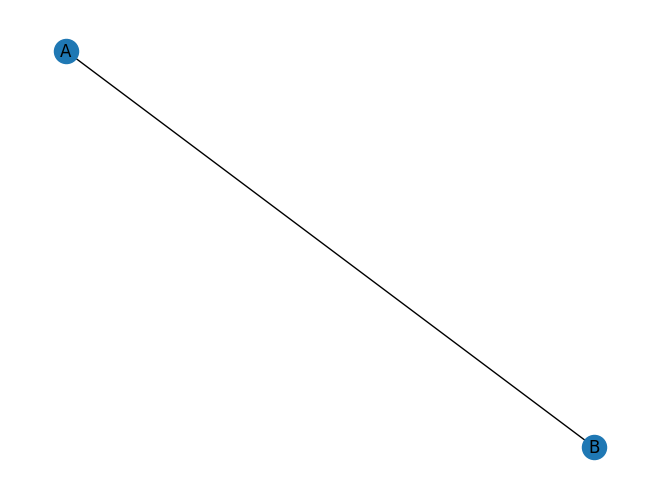

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Make the graph
G = nx.Graph()

# Adding nodes
G.add_node("A") #
G.add_node("B")

# Adding edges
G.add_edge("A", "B", weight=3)

# Displaying nodes and edges
print("Nodes:", G.nodes())
print("Edges:", G.edges(data=True))

# Visualise the graph
nx.draw(G, with_labels=True)
plt.show()

## Explanation of the Code


Based on the code above, we will explain the basic usage of NetworkX.
---

### 1. **Importing the Libraries**
```python
import networkx as nx
import matplotlib.pyplot as plt
```
- **`networkx`**: A library used to create and manipulate graphs.
- **`matplotlib.pyplot`**: Used to visualize the graph.

---

### 2. **Creating the Graph**
```python
G = nx.Graph()
```
- **`nx.Graph()`**: Create an undirected graph. Use this when the relationship between nodes is bidirectional.
  - There are also other types such as directed graphs (`DiGraph`) and weighted graphs.

---

### 3. **Adding Nodes**
```python
G.add_node("A")
G.add_node("B")
```
- **`add_node`**: Add nodes (vertices).
  - `"A"` and `"B"` are node labels.
  - You can use various data types, such as numbers or strings, as nodes.

---

### 4. **Adding Edges**
```python
G.add_edge("A", "B", weight=3)
```
- **`add_edge`**: Add an edge between nodes.
  - Here, we add an edge connecting nodes `"A"` and `"B"`.
  - The **`weight`** parameter assigns a numerical weight to the edge.

---

### 5. **Displaying nodes and edges**
```python
print("Nodes:", G.nodes())
print("Edges:", G.edges(data=True))
```
- **`G.nodes()`**: Retrieves all nodes in the graph.
- **`G.edges(data=True)`**: Retrieve all edges in the graph and display their attributes (here, the `weight`).

**Output Example**:
```
Nodes: ['A', 'B']
Edges: [('A', 'B', {'weight': 3})]
```

---

### 6. **Graph visualisation**
```python
nx.draw(G, with_labels=True)
plt.show()
```
- **`nx.draw`**: Draw the graph.
  - **`with_labels=True`**: Show labels on the nodes.
- **`plt.show()`**: Display/show the graph.

---

### Results
1. Nodes "A" and "B" are drawn, and the edge connecting them is displayed.
2. Although the edge has a weight of `weight=3`, it is not shown by default in the visualization. With customization, however, you can display the weight as an edge label.


---

### NetworkX's characteristics
- **Easily create graphs**: Nodes and edges can be added flexibly.
- **Rich analytical features**: Includes shortest-path search, clustering coefficient, PageRank, and more.
- **Supports many graph types**: Undirected graphs, directed graphs, weighted graphs, multigraphs, etc.
- **Visualization**: Can visualize network structures using Matplotlib or Graphviz.
---

NetworkX is very well-suited for modelling and analyzing data using graph theory.


It’s a good idea to start with the basic operations and gradually move on to more advanced analysis.

Now, we will finally use NetworkX to visualize the co-occurrence pairs in Run, Melos and display the frequency of co-occurrence, color-coded by paragraph.
Before doing that, we need to download a Japanese font so that the text can be displayed correctly in Japanese.

## Visualization of Character Co-occurrence by Paragraph Using NetworkX

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from collections import defaultdict
import matplotlib.font_manager as fm
import matplotlib.patches as mpatches

# Japanese font configuration (use an appropriate font when running in Google Colab)
# In Colab, fonts such as IPAexGothic are available
! curl -O "https://raw.githubusercontent.com/notofonts/noto-cjk/main/Sans/OTF/Japanese/NotoSansCJKjp-Regular.otf"

font_path = 'NotoSansCJKjp-Regular.otf'  
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = font_prop.get_name()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15.7M  100 15.7M    0     0  8805k      0  0:00:01  0:00:01 --:--:-- 8807k


Once the steps above have been executed, click the final run button to visualize the co-occurrence network.

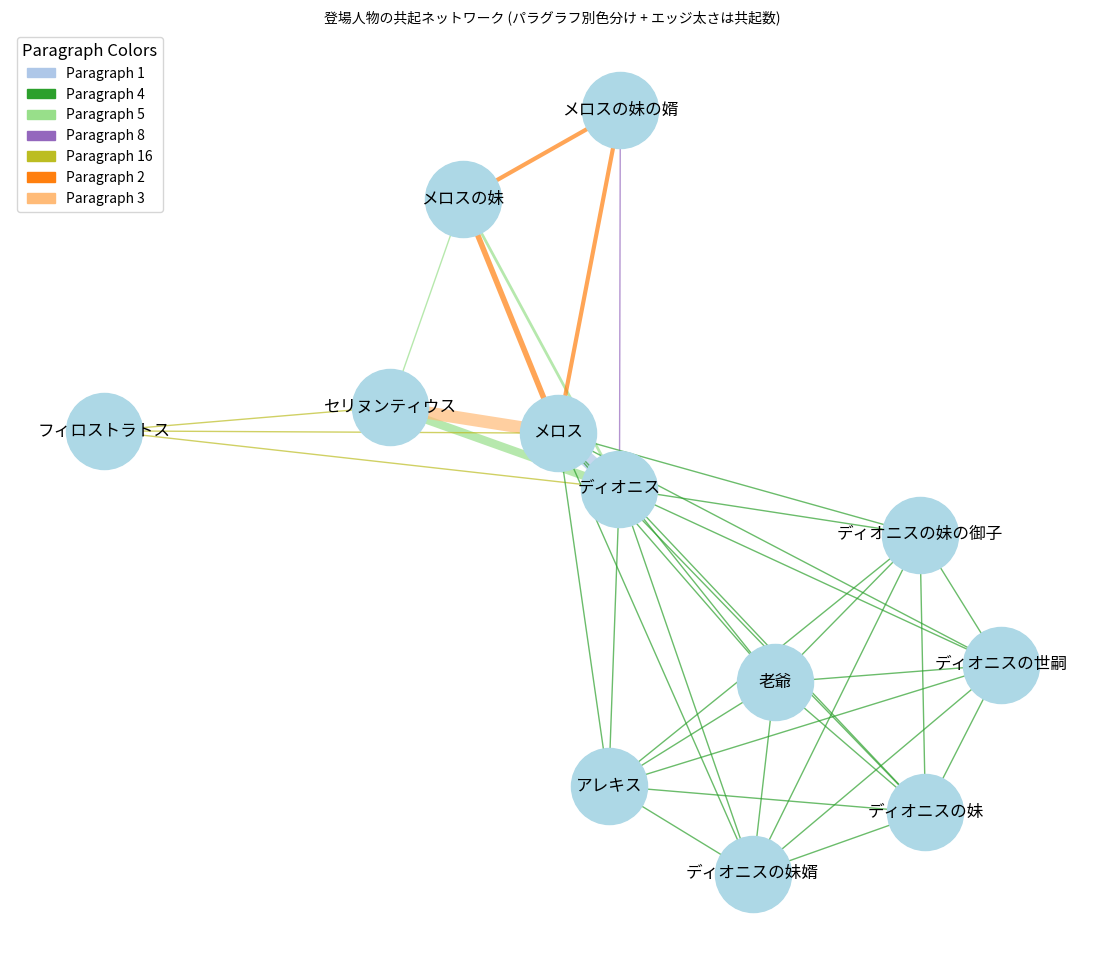

In [ ]:
# Creating the Network graph
G = nx.Graph()

for (char1, char2), paras in cooccurrence.items():
    G.add_edge(char1, char2, paragraphs=paras, weight=len(paras))  # The thickness of each edge is proportional to the number of paragraphs in which the characters co-occur

# Change the node labels to the corresponding names.
labels = {node: node for node in G.nodes}

# Assign colors based on paragraphs.
colors = plt.cm.tab20.colors  # A colormap with 20 colors
edge_colors = []
color_map = {}

for _, _, data in G.edges(data=True):
    # Determine the color according to the paragraph number.
    para_index = data['paragraphs'][0] % len(colors)
    edge_colors.append(colors[para_index])
    color_map[data['paragraphs'][0]] = colors[para_index]  # Store the color corresponding to each paragraph number

# Determine the positions of the nodes
pos = nx.spring_layout(G, seed=42)

# Drawing the nodes and edges
plt.figure(figsize=(14, 12))
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color="lightblue")
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=[G[u][v]['weight'] for u, v in G.edges()], alpha=0.7)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=12, font_color="black", font_weight="bold", font_family=font_prop.get_name())

# Create a legend.
legend_handles = [mpatches.Patch(color=color, label=f"Paragraph {para_num}") for para_num, color in color_map.items()]
plt.legend(handles=legend_handles, loc="upper left", title="Paragraph Colors", fontsize=10, title_fontsize=12, prop=font_prop)

# Title
plt.title("Character Co-occurrence Network (Paragraph Colors, Edge Thickness = Frequency)", fontsize=20, fontproperties=font_prop)
plt.axis('off')
plt.show()

## How to Read the Visualized Co-occurrence Network

### Structure and Interpretation of the Network

1. **Nodes (blue circles)**:
   - Each node represents a character. The node label displays the character’s name in Japanese.
   - For example, characters such as Melos, Dionys, and Selinuntius are included.

2. **Edges (lines)**:
   - Edges represent instances where characters appear together in the same paragraph (co-occurrence).
   - **Edge thickness**: This represents how often two characters co-occur. The thicker the edge, the more frequently the characters appear together in the same paragraph.

3. **Edge Colors**:
   - The color of each edge indicates in which paragraph the co-occurrence occurred.
   - Each color corresponds to a specific paragraph number, and the legend indicates which color matches which paragraph.

4. **Legend**:
   - Each edge is assigned a color based on the paragraph number.
   - For example, if “Paragraph 1” is red and “Paragraph 2” is blue, you can easily distinguish co-occurrences by paragraph based on color.

---

### How do you read it？
- **Thick edges**:
  - A thick edge may indicate a particularly important relationship between two characters. For example, if the edge between Melos and Selinuntius is noticeably thicker and includes multiple colors, it means that they appear together many times throughout the story.

- **Thin edges**:
  - This suggests that there is not necessarily a strong or significant relationship between the two characters. For example, Dionysus and his relatives appear together in Paragraph 4, but the relatives are likely included only to express Dionysus’s position or role, rather than functioning as meaningful characters in the story.

- **Number of edges**:
  - If a character has many edges extending from them, it suggests that they may be a character who exerts influence on many others.

- **Number of Colors**:
  - If multiple colors appear on a single edge, it indicates that the two characters co-occur frequently throughout the story.

---

### Insights gained from this visualization
- **Relationships among the main characters**:
  - Thick, colorful edges indicate relationships that are particularly important in the story.
  - Example: Melos and Dionysus, Melos and Selinuntius, and so on.

- **Characteristics by paragraph**:
  - For example: Melos and Dionys, or Melos and Selinuntius.
  - It helps track how relationships between characters change as the story progresses.

---

This diagram is a powerful tool for visualizing character relationships within the story. If more detailed analysis is needed, you can deepen the interpretation by comparing the relationships with the specific content of each paragraph.